preprocessing

In [287]:
library(readxl)
library(tidyverse)
library(writexl)
library(dplyr)

In [288]:
df <- read_excel("../../data/tidy/Cumulative_Data.xlsx",sheet=1)
head(df)
df.wb = read_excel("../../data/tidy/wb-data.xlsx",sheet=1)
df.rain = read_excel("../../data/tidy/wb-rain.xlsx",sheet=1)

df.rain = read_excel("../../data/tidy/wb-rain.xlsx",sheet=1)
df.rain = read_excel("../../data/tidy/wb-rain.xlsx",sheet=1)
df.rain = read_excel("../../data/tidy/wb-rain.xlsx",sheet=1)

head(df.wb)
head(df.rain)

Country,Year,Survey,imws,phom,pipy,ptap,H_PN,H_POP,bore,...,cart,mcyc,pcar,boat,P_LWQ,P_SWQ,P_MWQ,P_FWQ,P_HWQ,wigc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,NA,NA,20.1,...,5.8,35.2,11.8,NA,20,20.0,20.0,20,20.0,0.1
Albania,2017-18,DHS,98.4,48.8,5.2,2.4,NA,NA,1.4,...,3.2,9.6,37.0,0.7,20,20.0,20.0,20,20.0,0.1
Albania,2008-09,DHS,96.8,52.1,9.7,2.7,NA,NA,4.4,...,5.0,10.0,29.1,0.6,20,20.0,20.0,20,20.0,NA
Angola,2015-16,DHS,66.9,4.3,9.7,10.3,11.4,NA,1.9,...,1.3,17.8,10.9,0.4,20,20.0,20.0,20,20.0,0.3
Angola,2011,MIS,58.9,5.7,7.0,17.0,NA,NA,3.2,...,NA,14.6,12.2,1.0,20,20.0,20.0,20,20.0,NA
Angola,2006-07,MIS,65.6,5.5,10.7,9.6,NA,NA,1.1,...,1.4,9.2,14.0,NA,20,20.1,19.9,20,20.1,NA


Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],"Population, total [SP.POP.TOTL]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Population density (people per sq. km of land area) [EN.POP.DNST],Land area (sq. km) [AG.LND.TOTL.K2],"Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Literacy rate, youth (ages 15-24), gender parity index (GPI) [SE.ADT.1524.LT.FM.ZS]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,ALB,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Algeria,DZA,2018,YR2018,175405660377,42228429,72.629,17.73008,2381740,81.40784,0.99650,23.8
American Samoa,ASM,2018,YR2018,636000000,55465,87.153,277.32500,200,0.00000,0.00000,0.0
Andorra,AND,2018,YR2018,3218316013,77006,88.062,163.84255,470,0.00000,0.00000,3.1
Angola,AGO,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7


Country Name,Country Code,Average precipitation in depth (mm per year),2014 [YR2014]
<chr>,<chr>,<chr>,<chr>
Afghanistan,AFG,327,AG.LND.PRCP.MM
Albania,ALB,1485,NA
Algeria,DZA,89,NA
American Samoa,ASM,NA,NA
Andorra,AND,NA,NA
Angola,AGO,1010,NA


In [289]:
count(df.rain)
count(df.wb)
df.rain <- df.rain %>% 
  rename(
    Country = "Country Name",
    prec = "Average precipitation in depth (mm per year)",
       )


n
<int>
264


n
<int>
217


In [290]:
df.rain[, 3] <- sapply(df.rain[, 3], as.numeric)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"


In [291]:
df.rain[,3][is.na(df.rain[,3])] <- 0
head(df.rain)

Country,Country Code,prec,2014 [YR2014]
<chr>,<chr>,<dbl>,<chr>
Afghanistan,AFG,327,AG.LND.PRCP.MM
Albania,ALB,1485,NA
Algeria,DZA,89,NA
American Samoa,ASM,0,NA
Andorra,AND,0,NA
Angola,AGO,1010,NA


Cleaning Column Years

In [292]:
for (i in seq(1, nrow(df))) {
    if (grepl("-", df[i,'Year'])) {
        yy1 = substr(df[i,"Year"], start=1,stop=2)
        yy2 = substr(df[i,"Year"], start=6,stop=7)
        yy3 = paste(yy1,yy2,sep = "")
        #yy3 = as.integer(yy3)
        df[i,"Year"] = yy3
    }
    }

Renaming the column variables for the world bank data to be consistent with the rest of the data

In [293]:
df.wb <- df.wb %>% 
  rename(
    Year = Time,
    Country = "Country Name",
    cgdp = "GDP (current US$) [NY.GDP.MKTP.CD]",
    tpop = "Population, total [SP.POP.TOTL]",
    upop = "Urban population (% of total population) [SP.URB.TOTL.IN.ZS]",
    popd = "Population density (people per sq. km of land area) [EN.POP.DNST]",
    land ="Land area (sq. km) [AG.LND.TOTL.K2]", 
    lita = "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",  
    lity = "Literacy rate, youth (ages 15-24), gender parity index (GPI) [SE.ADT.1524.LT.FM.ZS]"  ,
    mori = "Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]" 
       )


turn character into numbers and factors

In [294]:
df.wb[, 3] <- sapply(df.wb[, 3], as.numeric)
df.wb[, 5:12] <- sapply(df.wb[, 5:12], as.numeric)
#df.wb[is.na(df.wb)] <- 0 # Convert all your NA to 0 to keep numeric values
class(df.wb) 
head(df.wb)

[1] "tbl_df"     "tbl"        "data.frame"

Country,Country Code,Year,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,ALB,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Algeria,DZA,2018,YR2018,175405660377,42228429,72.629,17.73008,2381740,81.40784,0.99650,23.8
American Samoa,ASM,2018,YR2018,636000000,55465,87.153,277.32500,200,0.00000,0.00000,0.0
Andorra,AND,2018,YR2018,3218316013,77006,88.062,163.84255,470,0.00000,0.00000,3.1
Angola,AGO,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7


Finding the Max Years

In [295]:
df$Year = as.numeric(df$Year)
df1 <- matrix(NA, nrow = 0, ncol = length(colnames(df))) #create new empty DF
colnames(df1) = colnames(df) # assign column names to empty data frame
for (country in unique(df$Country)) {
    maxyear = max(df[df$Country==country,'Year'])
    df1 = rbind( df1, df[(df$Country==country) & (df$Year==maxyear),])
} 

Removing Population Variables (Removal of duplication)

In [296]:
dfh = df1[,!grepl("^P_",names(df1))]

NA and zeros Analysis

In [297]:
na_count = colSums(is.na(dfh)) #Counting all your NA in each data frames
na_count
na.count.wb = colSums(is.na(df.wb))
na.count.wb

Country    Year  Survey    imws    phom    pipy    ptap    H_PN   H_POP    bore 
      0       0       0       1       4       6       5      44      77      18 
   pwel    pspr    rain    truc    ctan    venw    bott    sacw    purf    uiws 
     15      19      17       9      26      76       8      69      74       1 
   wepu    uwel    sppu    uspr    surw    othw    iwsp    basw    liws    watp 
     68      13      69      21       8      11       7       7       7       7 
   tles    tmor    wnao    niod    bicy    cart    mcyc    pcar    boat    wigc 
      7       7      54      54       5      22       4       1      25      19

Country Country Code         Year    Time Code         cgdp         tpop 
           0            0            0            0            0            0 
        upop         popd         land         lita         lity         mori 
           0            0            0            0            0            0

Removing column for household data frame if NA is greater than 50%`

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,NA,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,NA
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,NA,6.4,0.8,NA,0.3


Country    Year  Survey    imws    phom    pipy    ptap    bore    pwel    pspr 
      0       0       0       1       4       6       5      18      15      19 
   rain    truc    ctan    bott    uiws    uwel    uspr    surw    othw    iwsp 
     17       9      26       8       1      13      21       8      11       7 
   basw    liws    watp    tles    tmor    bicy    cart    mcyc    pcar    boat 
      7       7       7       7       7       5      22       4       1      25 
   wigc 
     19

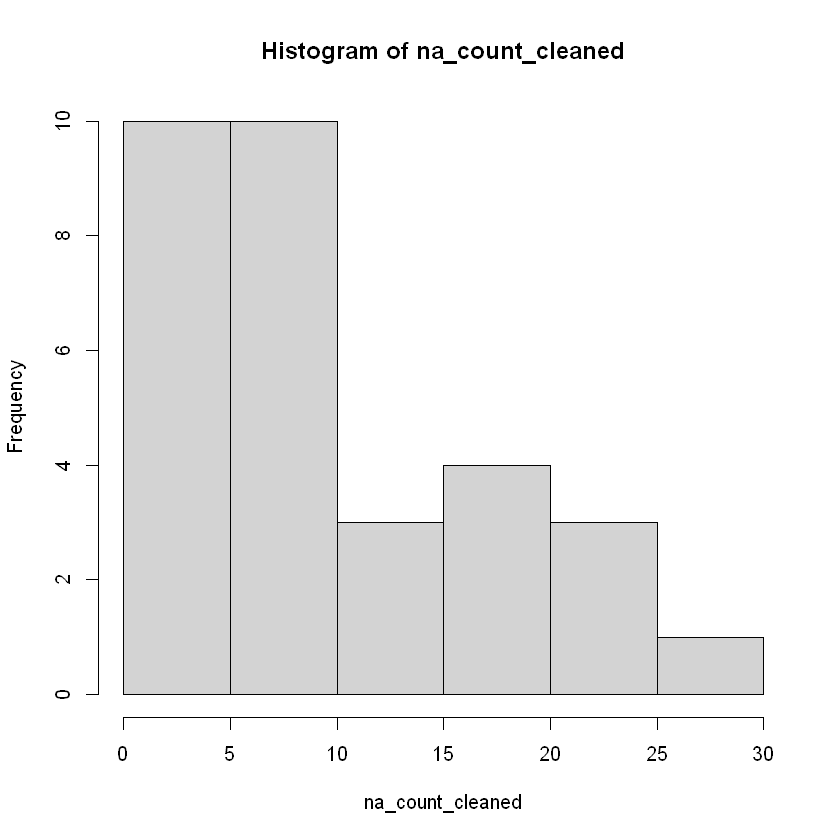

In [298]:
dfsimple = dfh[, which(colMeans(!is.na(dfh)) > 0.5)]
head(dfsimple)
na_count_cleaned = colSums(is.na(dfsimple)) #Counting all your NA in each data frames
na_count_cleaned
hist(na_count_cleaned)
zeros = colSums(dfsimple != 0) # Counting all your zeros in each data frame

# Understanding wb data and clean up

Country,Country Code,Year,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,ALB,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Algeria,DZA,2018,YR2018,175405660377,42228429,72.629,17.73008,2381740,81.40784,0.99650,23.8
American Samoa,ASM,2018,YR2018,636000000,55465,87.153,277.32500,200,0.00000,0.00000,0.0
Andorra,AND,2018,YR2018,3218316013,77006,88.062,163.84255,470,0.00000,0.00000,3.1
Angola,AGO,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 4.085e+09 2.411e+10 3.924e+11 1.754e+11 2.058e+13 

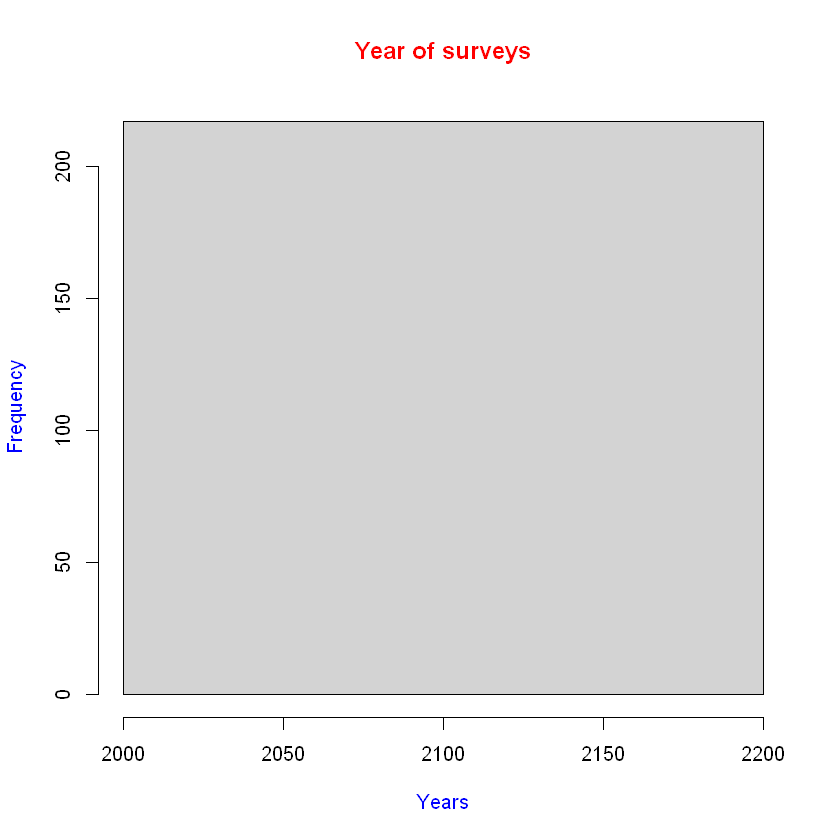

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 4.085e+09 2.411e+10 3.924e+11 1.754e+11 2.058e+13 

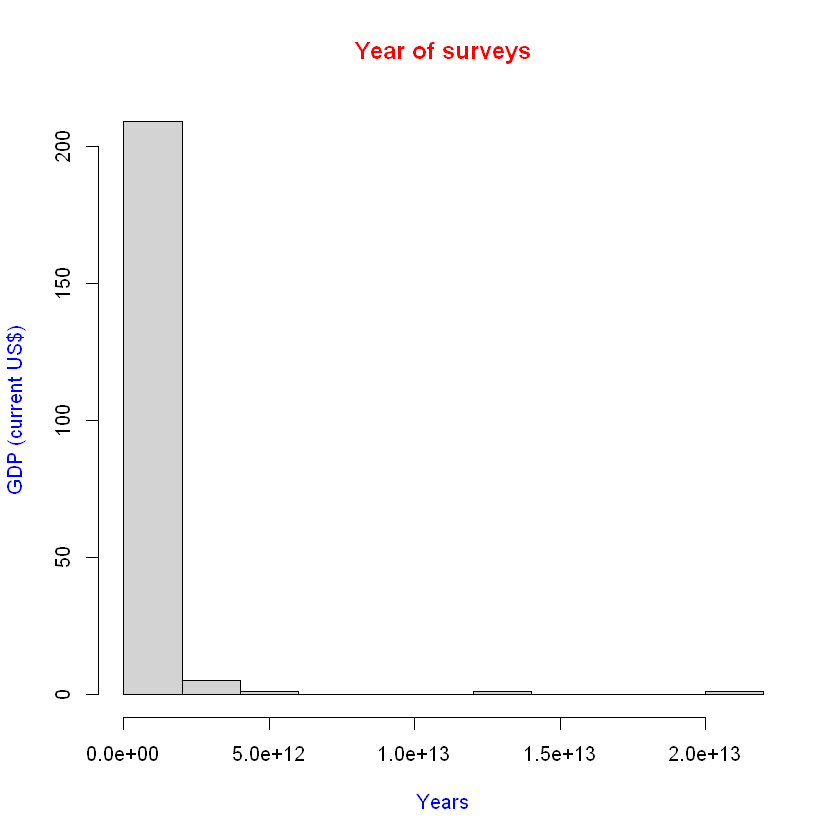

In [299]:
head(df.wb)
hist(df.wb$Year, main="Year of surveys",
     xlab="Years",
     ylab="Frequency",
     col.main="red", col.lab="blue")
summary(df.wb$cgdp) # House hold with unimproved water source
hist(df.wb$cgdp, main="Year of surveys",
     xlab="Years",
     ylab="GDP (current US$) ",
     col.main="red", col.lab="blue")
summary(df.wb$cgdp) # House hold with unimproved water source

# Counting Year less than 2000. 

In [300]:
head(dfsimple$Year , 7)

sum(dfsimple$Year < 2000)

dfsimple[dfsimple$Year < 2000, ]

dfsimplepost2000 = filter(dfsimple, Year >=2000 & Year < 2020)

head(dfsimplepost2000,7)
count(dfsimplepost2000)

[1] 2015 2018 2016 2016 2006 2014 2018

[1] 5

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,1996,DHS,76.0,69.2,3.5,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,30.2,NA,NA
Central African Republic,1995,DHS,16.3,NA,1.7,14.6,NA,NA,NA,...,1.1,7.5,75.1,17.4,11.5,NA,4.5,1.4,NA,NA
Kazakhstan,1999,DHS,69.4,49.5,9.2,7.6,NA,NA,NA,...,0.8,70.1,26.4,2.9,14.0,NA,9.1,26.7,NA,NA
Paraguay,1990,DHS,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Uzbekistan,1996,DHS,80.6,59.7,NA,18.0,NA,NA,NA,...,1.3,72.5,24.5,2.3,20.0,NA,10.2,21.2,NA,NA


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,NA,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,NA
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,NA,6.4,0.8,NA,0.3
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3


n
<int>
73


In [301]:
write_xlsx(dfsimplepost2000, '../../results/dfsimple.xlsx')

# Preliminary Data Visualization

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.1     6.9    17.1    18.9    28.3    65.6 

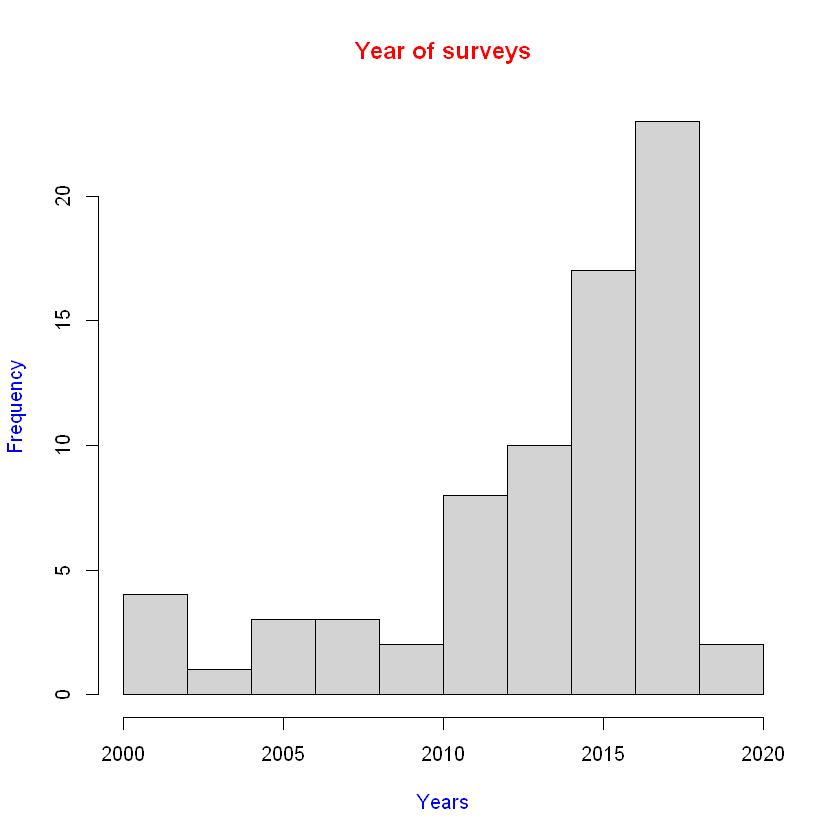

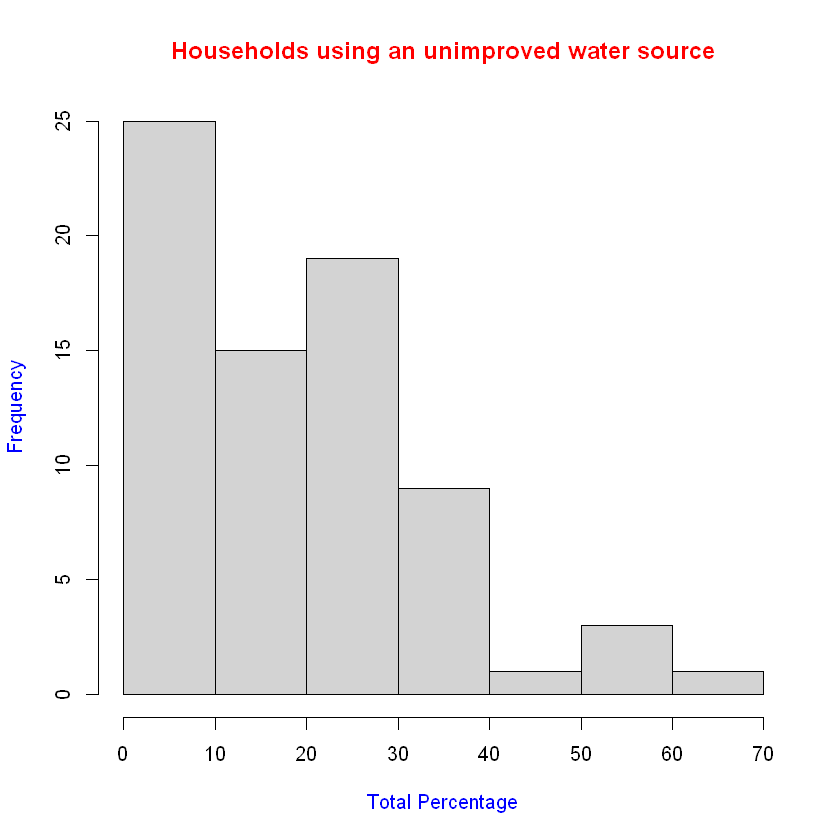

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.30   10.50   22.45   24.13   35.15   82.00       3 

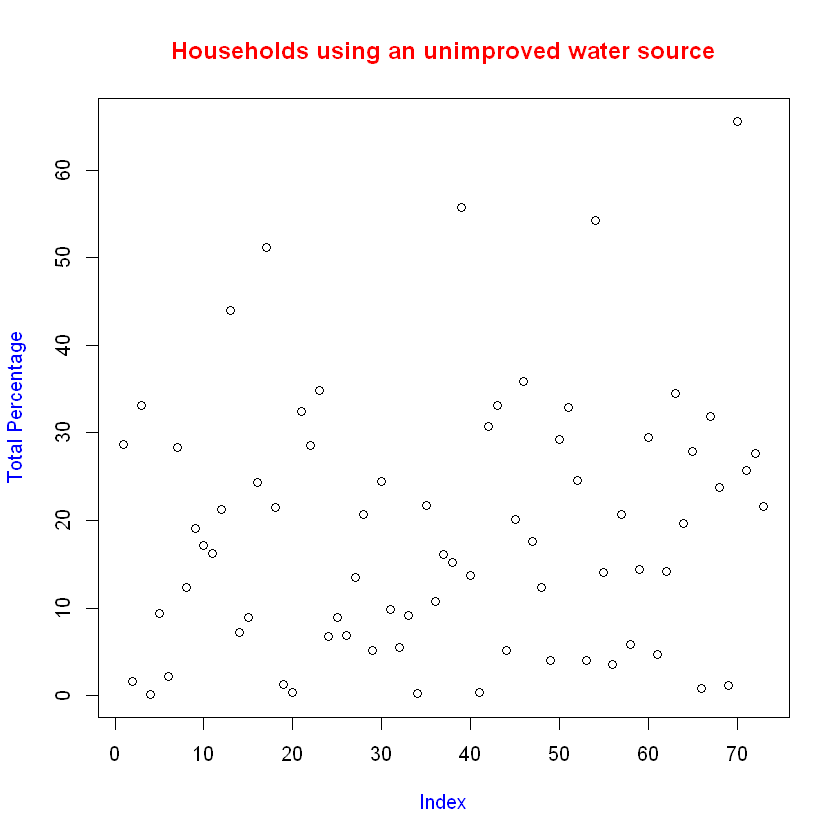

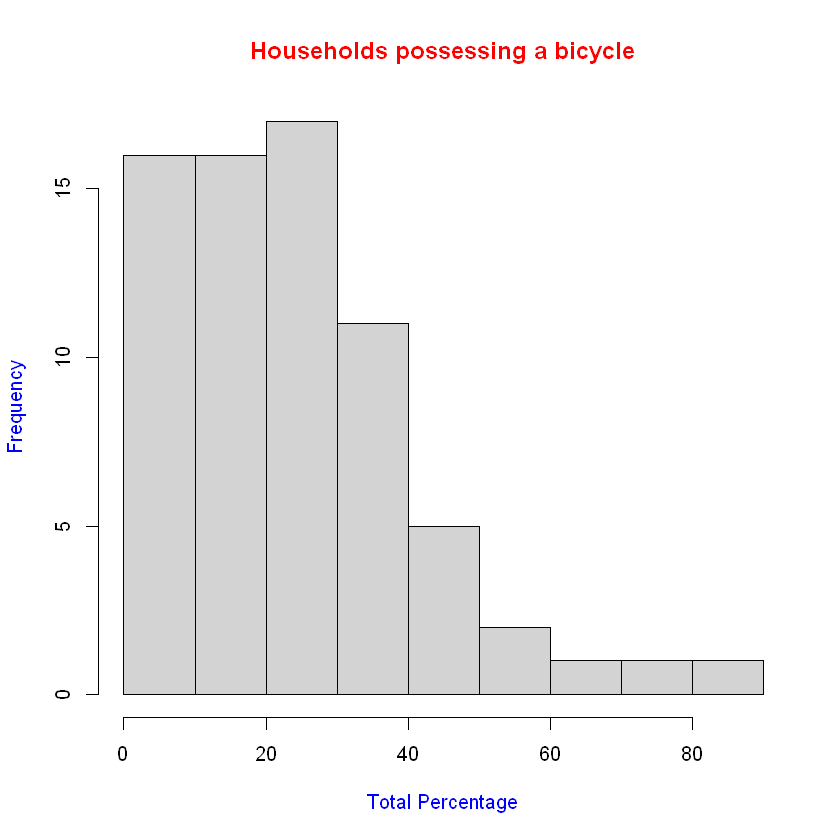

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2000    2012    2015    2014    2017    2019 

   Length     Class      Mode 
       73 character character 

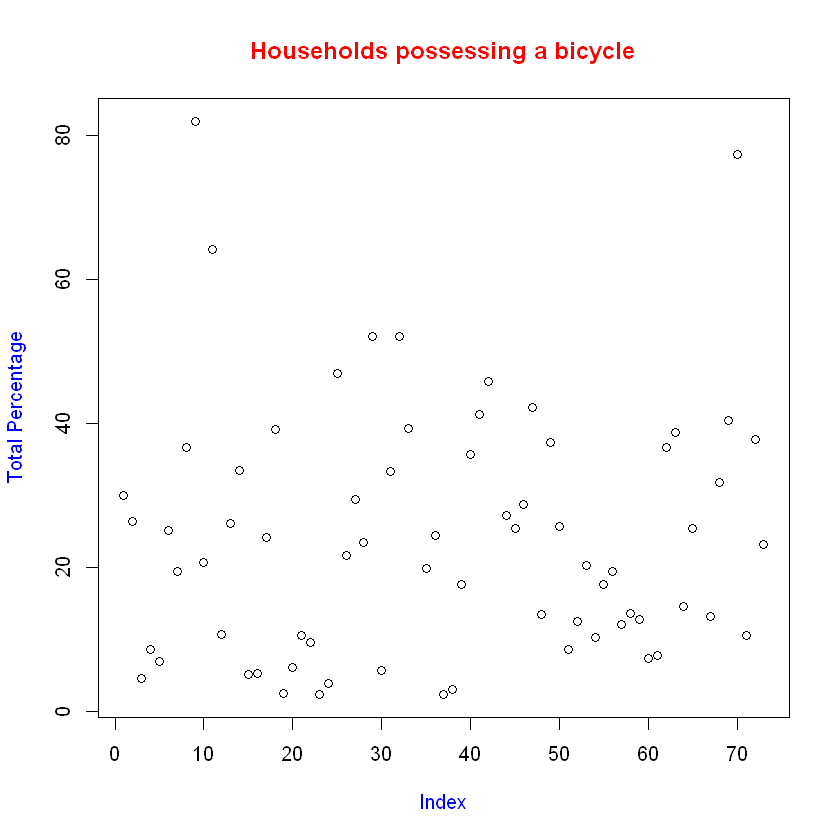

In [302]:
df <- dfsimplepost2000
hist(df$Year, main="Year of surveys",
     xlab="Years",
     ylab="Frequency",
     col.main="red", col.lab="blue")
summary(df$uiws ) # House hold with unimproved water source
hist(df$uiws, main="Households using an unimproved water source",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(df$uiws , main="Households using an unimproved water source",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(df$bicy) # house hold with possession of bicycle. 
hist(df$bicy, main="Households possessing a bicycle",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(df$bicy, main="Households possessing a bicycle",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(df$Year)
summary(df$Country)

# additional clean up

In [303]:
setdiff(df$Country, df.wb$Country)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Egypt"                     "Gambia"                   
[5] "Namibia"                   "Yemen"

In [304]:
# Correct the country names in DF

df.wb [df.wb =='namibia'] = "Namibia"
df.wb [df.wb =='Yemen, Rep.'] = "Yemen" 
df.wb [df.wb =='Gambia, The'] = "Gambia"
df.wb [df.wb =='Egypt, Arab Rep.'] = "Egypt"
df.wb [df.wb =='Congo, Dem. Rep.'] = "Congo Democratic Republic"
df.wb [df.wb =='Congo, Rep.'] = "Congo"

In [305]:
setdiff(df$Country, df.wb$Country) # Double Check

character(0)

In [306]:
df.wb <- merge(x = df,
              y = df.wb,
              by = c("Country"))

head(df.wb)
df.exp <- df.wb[, c(1,33:42 ) ]
head(df.exp,7)
#df.exp$Country
#summary(df.exp)

,Country,Year.x,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,Year.y,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
2,Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
3,Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7
4,Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,2018,YR2018,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4
5,Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,2018,YR2018,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6
6,Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,2018,YR2018,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3


,Country,Year.y,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
2,Albania,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
3,Angola,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7
4,Armenia,2018,YR2018,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4
5,Azerbaijan,2018,YR2018,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6
6,Bangladesh,2018,YR2018,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3
7,Benin,2018,YR2018,14250985959,11485048,47.312,101.85392,112760,42.36240,0.74459,92.8


In [307]:
setdiff(df$Country, df.rain$Country)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Egypt"                     "Gambia"                   
[5] "Yemen"

In [308]:
# Correct the country names in DF

df.rain [df.rain =='namibia'] = "Namibia"
df.rain [df.rain =='Yemen, Rep.'] = "Yemen" 
df.rain [df.rain =='Gambia, The'] = "Gambia"
df.rain [df.rain =='Egypt, Arab Rep.'] = "Egypt"
df.rain [df.rain =='Congo, Dem. Rep.'] = "Congo Democratic Republic"
df.rain [df.rain =='Congo, Rep.'] = "Congo"

In [309]:
setdiff(df$Country, df.rain$Country) # Double Check

character(0)

In [310]:
df.exp <- merge(x = df.exp,
              y = df.rain,
              by = c("Country"))


In [311]:
df.exp <- df.exp[,c(1:11,13)] #Precitpation in mm and is from 2014 survey
head(df.exp)

,Country,Year.y,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori,prec
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5,327
2,Albania,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5,1485
3,Angola,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7,1010
4,Armenia,2018,YR2018,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4,562
5,Azerbaijan,2018,YR2018,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6,447
6,Bangladesh,2018,YR2018,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3,2666


In [312]:
summary(df.exp)
write_xlsx(df.exp, '../../results/df-wb.xlsx')

   Country              Year.y      Time Code              cgdp          
 Length:73          Min.   :2018   Length:73          Min.   :0.000e+00  
 Class :character   1st Qu.:2018   Class :character   1st Qu.:1.091e+10  
 Mode  :character   Median :2018   Mode  :character   Median :2.349e+10  
                    Mean   :2018                      Mean   :1.237e+11  
                    3rd Qu.:2018                      3rd Qu.:7.617e+10  
                    Max.   :2018                      Max.   :2.713e+12  
      tpop                upop            popd              land        
 Min.   :0.000e+00   Min.   : 0.00   Min.   :   0.00   Min.   :    300  
 1st Qu.:6.323e+06   1st Qu.:29.36   1st Qu.:  37.51   1st Qu.:  94280  
 Median :1.585e+07   Median :42.63   Median :  82.24   Median : 273600  
 Mean   :5.239e+07   Mean   :44.43   Mean   : 152.64   Mean   : 496093  
 3rd Qu.:3.717e+07   3rd Qu.:56.37   3rd Qu.: 147.75   3rd Qu.: 770880  
 Max.   :1.353e+09   Max.   :90.98   Max.   